<a href="https://colab.research.google.com/github/harsh21051993/portfolio/blob/main/marketing_analytics_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Context**


> An hypothetical well estabilished company operating in the retail 
food sector is considered. The company has had solid reveues and healthy
bottom line in the past 3 years, but growth prospects for the next 3 
years are not promising. The marketing department was pressured to
optimize it's annual budget even further. I was hired as a Data Analyst recently and have been asked by the CMO to analyze recent marketing campaigns and provide data-driven solutions.





#[Data set link](https://github.com/nailson/ifood-data-business-analyst-test/blob/master/ml_project1_data.csv)



# Data Wrangling

## **Initialization**

In [1]:
import math
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from urllib import request
import numpy as np

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

# set up to view all the info of the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

##Download csv

In [2]:
response = request.urlretrieve("https://raw.githubusercontent.com/nailson/ifood-data-business-analyst-test/master/ml_project1_data.csv", "original_df.csv")

In [3]:
original_df = pd.read_csv('original_df.csv')
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

##Change column names to make them more readable

In [4]:
readable_df = original_df.copy()
readable_df.rename(columns={'Year_Birth':'BirthYear', 'Marital_Status':'MaritalStatus', 'Kidhome':'NumKidHome', 'Teenhome':'NumTeenHome', 'Dt_Customer':'DateCustomerAcq',
                            'MntWines':'AmntWines', 'MntFruits':'AmntFruits', 'MntMeatProducts':'AmntMeatProducts', 'MntFishProducts':'AmntFishProducts', 
                            'MntSweetProducts':'AmntSweetProducts','MntGoldProds':'AmntGoldProds'}, inplace=True)
readable_df.columns

Index(['ID', 'BirthYear', 'Education', 'MaritalStatus', 'Income', 'NumKidHome',
       'NumTeenHome', 'DateCustomerAcq', 'Recency', 'AmntWines', 'AmntFruits',
       'AmntMeatProducts', 'AmntFishProducts', 'AmntSweetProducts',
       'AmntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

#Explotary Data Analysis of the data set

##Cleaning income column


In [5]:
income_df = readable_df[readable_df.Income.isnull()==False]
nan_income_df = readable_df[readable_df.Income.isnull()==True]

# Convert the one that has income to int type
income_df.Income = income_df.Income.astype(int)

# give a string value of "0" to missing value, then we can convert it into int type
nan_income_df.Income = str(income_df.Income.median())

nan_income_df.Income = nan_income_df.Income.str.replace(".5", "")
nan_income_df.Income = nan_income_df.Income.astype(int)


#combine the data
readable_df = nan_income_df.append(income_df)
readable_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 10 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   BirthYear            2240 non-null   int64 
 2   Education            2240 non-null   object
 3   MaritalStatus        2240 non-null   object
 4   Income               2240 non-null   int64 
 5   NumKidHome           2240 non-null   int64 
 6   NumTeenHome          2240 non-null   int64 
 7   DateCustomerAcq      2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   AmntWines            2240 non-null   int64 
 10  AmntFruits           2240 non-null   int64 
 11  AmntMeatProducts     2240 non-null   int64 
 12  AmntFishProducts     2240 non-null   int64 
 13  AmntSweetProducts    2240 non-null   int64 
 14  AmntGoldProds        2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWe

##Cleaning DateCustomerAcq column

In [6]:
readable_df.DateCustomerAcq = pd.to_datetime(readable_df.DateCustomerAcq)
readable_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 10 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   BirthYear            2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   MaritalStatus        2240 non-null   object        
 4   Income               2240 non-null   int64         
 5   NumKidHome           2240 non-null   int64         
 6   NumTeenHome          2240 non-null   int64         
 7   DateCustomerAcq      2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   AmntWines            2240 non-null   int64         
 10  AmntFruits           2240 non-null   int64         
 11  AmntMeatProducts     2240 non-null   int64         
 12  AmntFishProducts     2240 non-null   int64         
 13  AmntSweetProducts    2240 non-nu

Converting BirthYear column to Age (in year 2020)

In [7]:
readable_df['Age1'] = 2020 - readable_df.BirthYear
readable_df = readable_df.drop(columns=['BirthYear'], axis=1)
readable_df.insert(1, 'Age', readable_df['Age1'])
readable_df = readable_df.drop(['Age1'], axis=1)

In [8]:
readable_df.head()

,ID,Age,Education,MaritalStatus,Income,NumKidHome,NumTeenHome,DateCustomerAcq,Recency,AmntWines,AmntFruits,AmntMeatProducts,AmntFishProducts,AmntSweetProducts,AmntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,37,Graduation,Married,51381,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,34,Graduation,Single,51381,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,61,PhD,Single,51381,0,0,2013-11-05,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,69,Graduation,Single,51381,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,38,Graduation,Single,51381,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0


In [9]:
# store the file
readable_df.reset_index(drop=True)
readable_df.to_csv('readable_df.csv', index=False)

In [10]:
#load data
df = pd.read_csv('readable_df.csv')

##Analyzing outliers present in the data set

We will be visualizing the outliers present in the data set through boxplots. 



> A box plot is a standard way to visualize the quartiles for numerical values in data. Quartiles divide numerical data into four groups:
1.   The first quartile is the middle number between the minimum and the median, so 25 percent of the data falls below this point.
2.   The second quartile is the median, which means that 50 percent of the data falls below this point.
3. The third quartile is the middle number between the maximum and the median, so 75 percent of the data falls below this point. 
4. The fourth quartile is the highest 25 percent of the data 







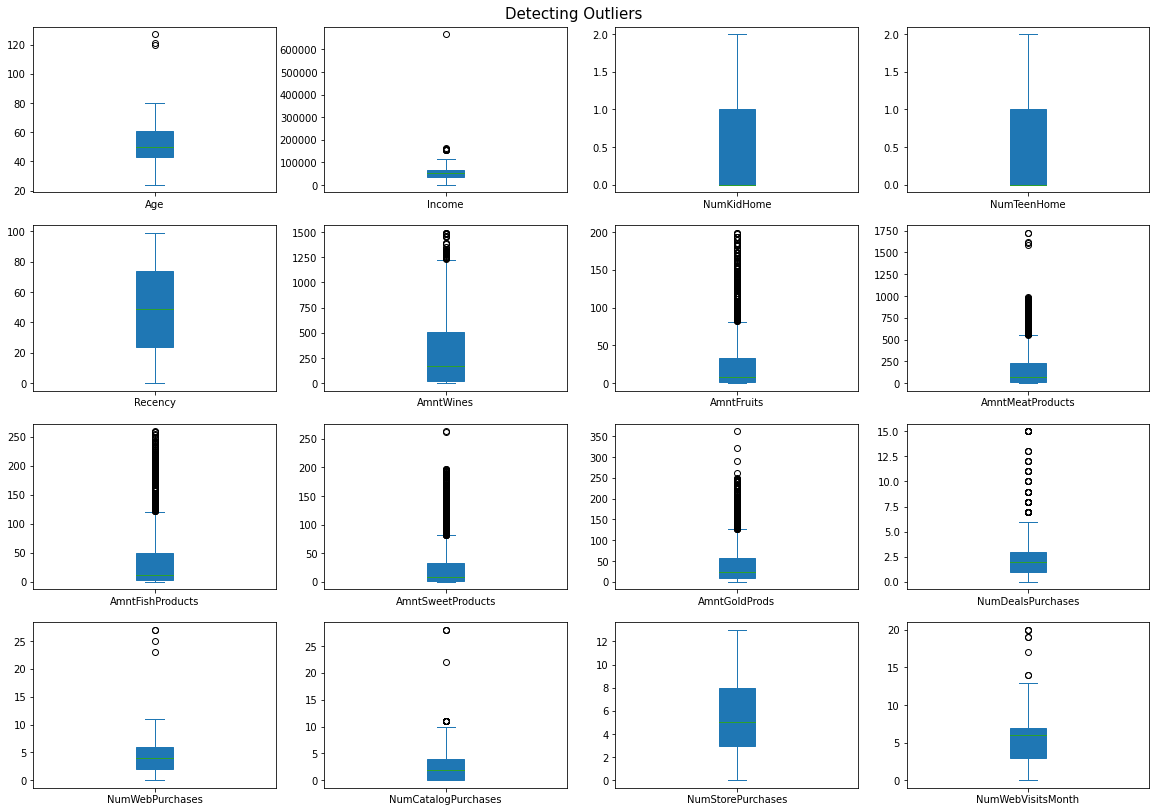

In [11]:
df_to_plot = df.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 
                              'Response', 'Complain', 'Z_CostContact', 'Z_Revenue']).select_dtypes(include=np.number)


# subplots
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(20,14), patch_artist=True)
plt.suptitle('Detecting Outliers', fontsize=15, y=0.9)
plt.savefig('boxplots.png', bbox_inches='tight')
 

##Removing outliers from Age column

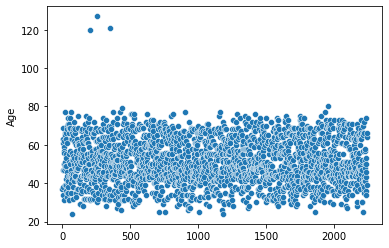

In [12]:
sns.scatterplot(data=df['Age'])

In [13]:
df.Age.describe()

count    2240.000000
mean       51.194196
std        11.984069
min        24.000000
25%        43.000000
50%        50.000000
75%        61.000000
max       127.000000
Name: Age, dtype: float64

In [14]:
# Remove those entries from Age column where value of Age is 3 standard deviations away
new_df1 = df[(df['Age'] <= (df.Age.mean()+3*df.Age.std())) & (df['Age'] >= (df.Age.mean()-3*df.Age.std()))]
new_df1.Age.describe()

count    2237.000000
mean       51.098346
std        11.701917
min        24.000000
25%        43.000000
50%        50.000000
75%        61.000000
max        80.000000
Name: Age, dtype: float64

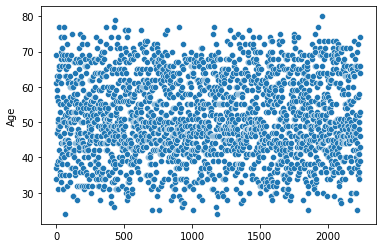

In [15]:
sns.scatterplot(data=new_df1['Age'])

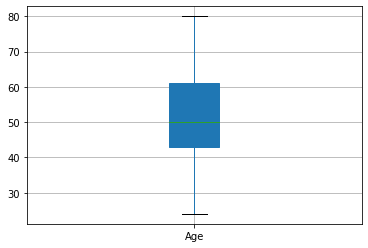

In [16]:
new_df1.boxplot(['Age'], patch_artist=True)

(array([  0.,   0.,  43., 342., 702., 534., 480., 136.]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70, 80]),
 <a list of 8 Patch objects>)

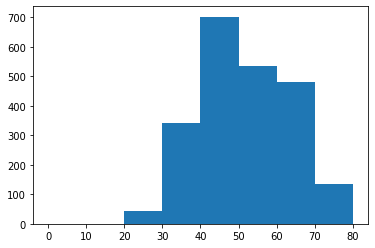

In [89]:
plt.hist(new_df1['Age'], bins = range(0, 90, 10))

Most of the samples come from the age group 40-70.

In [20]:
cols = new_df1.columns
print('Column name                    is Nan present')
for i in range(len(cols)):
  check_nan = new_df1[cols[i]].isnull().values.any()
  print(f'{cols[i]} has NaN = {check_nan}')

Column name                    is Nan present
ID has NaN = False
Age has NaN = False
Education has NaN = False
MaritalStatus has NaN = False
Income has NaN = False
NumKidHome has NaN = False
NumTeenHome has NaN = False
DateCustomerAcq has NaN = False
Recency has NaN = False
AmntWines has NaN = False
AmntFruits has NaN = False
AmntMeatProducts has NaN = False
AmntFishProducts has NaN = False
AmntSweetProducts has NaN = False
AmntGoldProds has NaN = False
NumDealsPurchases has NaN = False
NumWebPurchases has NaN = False
NumCatalogPurchases has NaN = False
NumStorePurchases has NaN = False
NumWebVisitsMonth has NaN = False
AcceptedCmp3 has NaN = False
AcceptedCmp4 has NaN = False
AcceptedCmp5 has NaN = False
AcceptedCmp1 has NaN = False
AcceptedCmp2 has NaN = False
Complain has NaN = False
Z_CostContact has NaN = False
Z_Revenue has NaN = False
Response has NaN = False


##Add 4 new columns:
1. Customer acquisition year
2. Customer acquisition month
3. Customer acquisition day
4. Customer acquisition day name

In [21]:
new_df1.DateCustomerAcq = pd.to_datetime(new_df1.DateCustomerAcq)


# Create new features
new_df1["CustomerAcqYear"] = new_df1.DateCustomerAcq.dt.year
new_df1["CustomerAcqMonth"] = new_df1.DateCustomerAcq.dt.month
new_df1["CustomerAcqDay"] = new_df1.DateCustomerAcq.dt.day
new_df1["CustomerAcqDayName"] = new_df1.DateCustomerAcq.dt.weekday
new_df1["NumMinorHome"] = new_df1.NumKidHome + new_df1.NumTeenHome
new_df1['TotalAmntSpent'] = new_df1.AmntWines+ new_df1.AmntFruits+ new_df1.AmntMeatProducts+ new_df1.AmntFishProducts+ new_df1.AmntSweetProducts+ new_df1.AmntGoldProds 
new_df1['NumTotalPurchase'] = new_df1.NumDealsPurchases+ new_df1.NumWebPurchases+ new_df1.NumCatalogPurchases+ new_df1.NumStorePurchases+ new_df1.NumWebVisitsMonth 
new_df1['NumTotalAccept'] = new_df1.AcceptedCmp1 + new_df1.AcceptedCmp2 + new_df1.AcceptedCmp2 + new_df1.AcceptedCmp2  + new_df1.AcceptedCmp3 + new_df1.AcceptedCmp4 + new_df1.AcceptedCmp5 + new_df1.Response
new_df1['AOV'] = new_df1.TotalAmntSpent/new_df1.NumTotalPurchase

In [22]:
new_df1 = new_df1.drop(['DateCustomerAcq'], axis=1)

In [23]:
new_df1.columns

Index(['ID', 'Age', 'Education', 'MaritalStatus', 'Income', 'NumKidHome',
       'NumTeenHome', 'Recency', 'AmntWines', 'AmntFruits', 'AmntMeatProducts',
       'AmntFishProducts', 'AmntSweetProducts', 'AmntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'CustomerAcqYear',
       'CustomerAcqMonth', 'CustomerAcqDay', 'CustomerAcqDayName',
       'NumMinorHome', 'TotalAmntSpent', 'NumTotalPurchase', 'NumTotalAccept',
       'AOV'],
      dtype='object')

In [24]:
new_df1.head()

,ID,Age,Education,MaritalStatus,Income,NumKidHome,NumTeenHome,Recency,AmntWines,AmntFruits,AmntMeatProducts,AmntFishProducts,AmntSweetProducts,AmntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,CustomerAcqYear,CustomerAcqMonth,CustomerAcqDay,CustomerAcqDayName,NumMinorHome,TotalAmntSpent,NumTotalPurchase,NumTotalAccept,AOV
0,1994,37,Graduation,Married,51381,1,0,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0,2013,11,15,4,1,19,11,0,1.727273
1,5255,34,Graduation,Single,51381,1,0,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0,2013,2,20,2,1,637,28,0,22.750000
2,7281,61,PhD,Single,51381,0,0,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0,2013,11,5,1,0,186,11,0,16.909091
3,7244,69,Graduation,Single,51381,2,1,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0,2014,1,1,2,3,124,16,0,7.750000
4,8557,38,Graduation,Single,51381,1,0,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0,2013,6,17,0,1,46,13,0,3.538462


In [26]:
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 2239
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2237 non-null   int64  
 1   Age                  2237 non-null   int64  
 2   Education            2237 non-null   object 
 3   MaritalStatus        2237 non-null   object 
 4   Income               2237 non-null   int64  
 5   NumKidHome           2237 non-null   int64  
 6   NumTeenHome          2237 non-null   int64  
 7   Recency              2237 non-null   int64  
 8   AmntWines            2237 non-null   int64  
 9   AmntFruits           2237 non-null   int64  
 10  AmntMeatProducts     2237 non-null   int64  
 11  AmntFishProducts     2237 non-null   int64  
 12  AmntSweetProducts    2237 non-null   int64  
 13  AmntGoldProds        2237 non-null   int64  
 14  NumDealsPurchases    2237 non-null   int64  
 15  NumWebPurchases      2237 non-null   i

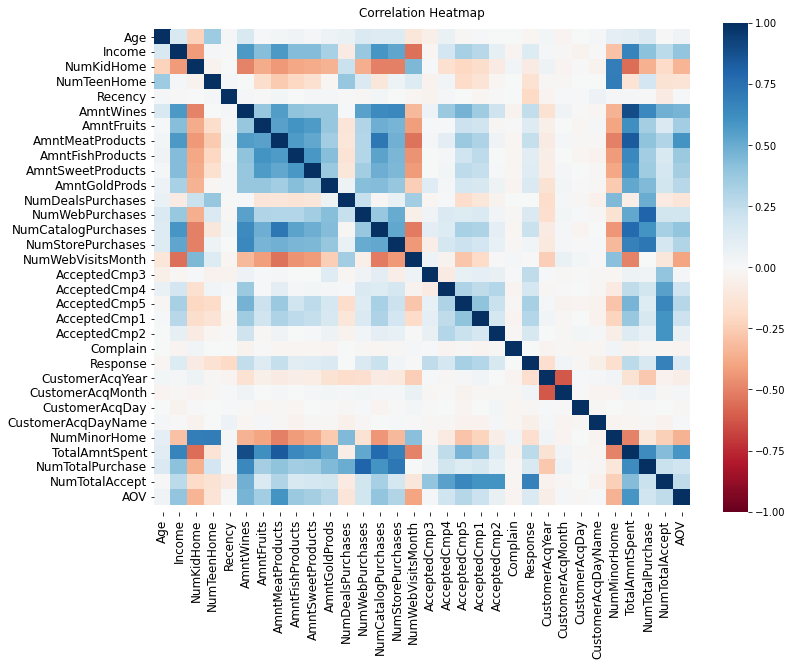

In [27]:
# select columns to plot
df_to_plot = new_df1.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue'])

# create heatmap
plt.figure(figsize = (12, 9))
s = sns.heatmap(df_to_plot.corr(),  cmap = 'RdBu',vmin = -1, vmax = 1,center = 0)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
bottom, top = s.get_ylim()
s.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Correlation Heatmap")
plt.savefig('heatmap.png', bbox_inches='tight')
plt.show()

In [28]:
# select columns to plot
df_to_plot = new_df1.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue'])
df_to_plot.describe()

,Age,Income,NumKidHome,NumTeenHome,Recency,AmntWines,AmntFruits,AmntMeatProducts,AmntFishProducts,AmntSweetProducts,AmntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,CustomerAcqYear,CustomerAcqMonth,CustomerAcqDay,CustomerAcqDayName,NumMinorHome,TotalAmntSpent,NumTotalPurchase,NumTotalAccept,AOV
count,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000
mean,51.098346,52227.402325,0.444345,0.506482,49.104604,303.995530,26.270451,166.916853,37.523022,27.068842,43.968708,2.326777,4.087170,2.662494,5.794367,5.319177,0.072865,0.074654,0.072418,0.064372,0.013411,0.008941,0.149307,2013.027716,6.465802,15.628520,2.988824,0.950827,605.743406,20.189987,0.473849,inf
std,11.701917,25043.267011,0.538467,0.544593,28.956073,336.574382,39.715972,225.661158,54.639909,41.293949,52.054318,1.932923,2.779461,2.923456,3.250940,2.426386,0.259974,0.262890,0.259237,0.245469,0.115052,0.094152,0.356471,0.684704,3.488073,8.791063,2.000081,0.752037,601.840466,7.290492,1.008843,NaN
min,24.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.000000,1.000000,1.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.228571
25%,43.000000,35523.000000,0.000000,0.000000,24.000000,24.000000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,3.000000,8.000000,1.000000,0.000000,69.000000,14.000000,0.000000,5.000000
50%,50.000000,51381.000000,0.000000,0.000000,49.000000,174.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,6.000000,16.000000,3.000000,1.000000,396.000000,19.000000,0.000000,17.214286
75%,61.000000,68281.000000,1.000000,1.000000,74.000000,504.000000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,10.000000,23.000000,5.000000,1.000000,1045.000000,25.000000,1.000000,39.022727
max,80.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2014.000000,12.000000,31.000000,6.000000,3.000000,2525.000000,46.000000,7.000000,inf


<Figure size 2160x2160 with 0 Axes>

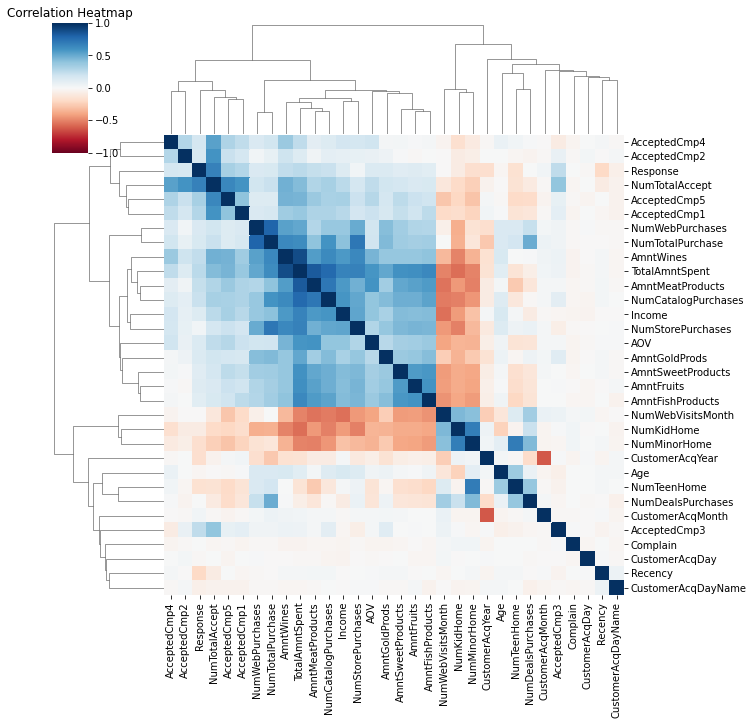

In [30]:
plt.figure(figsize = (30, 30))
s = sns.clustermap(df_to_plot.corr(),  cmap = 'RdBu',vmin = -1, vmax = 1,center = 0)
plt.title("Correlation Heatmap")
plt.show()

##Comparing purchases with campaign acceptance

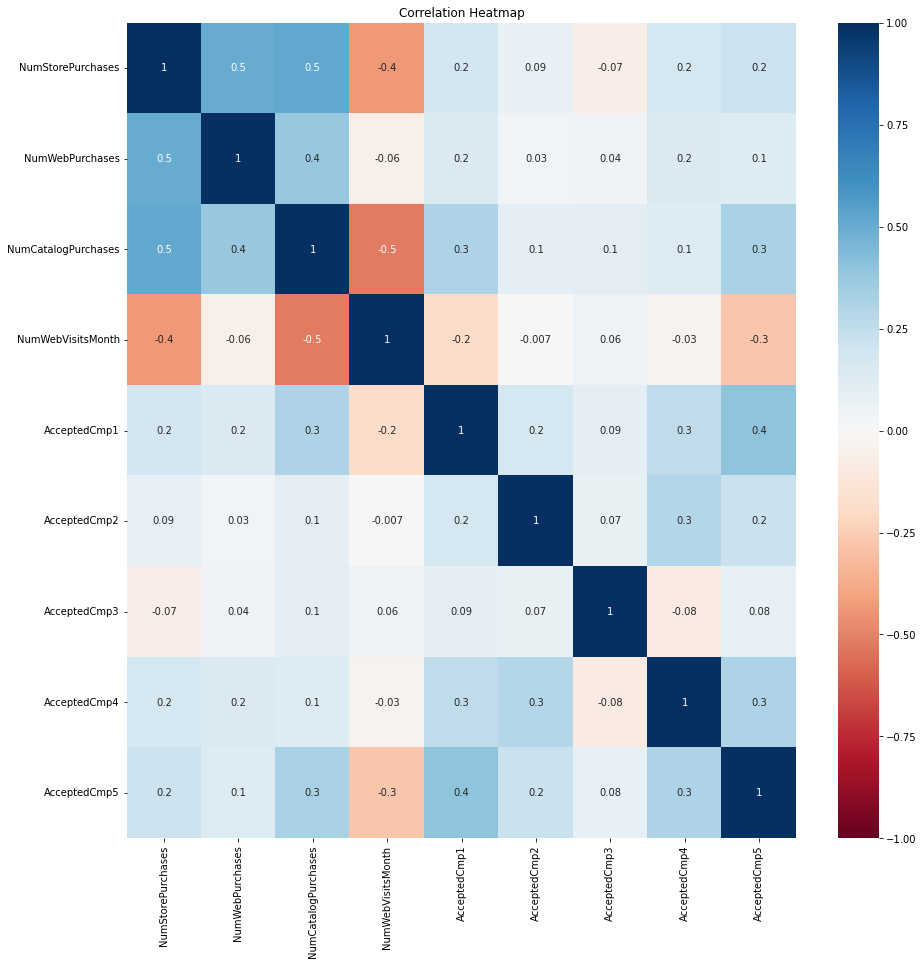

In [33]:
plt.figure(figsize = (15, 15))
tempdf1 = new_df1[['NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']]
s = sns.heatmap(tempdf1.corr(),  cmap = 'RdBu',vmin = -1, vmax = 1,center = 0, fmt='.1g', annot=True)
plt.title("Correlation Heatmap")
plt.show()

The above heatmap shows that:
1. Customers doing store purchases and catalog purchases were less likely to have visited the website in the last month.
2. Customers who visited the website last month were less likely to have accepted any campaign, except for campaign 3.
3. Campaign 3 was only sucessfull with people who do catalog purchases.
4. Customers are more likely to accept future campaigns if they have already accepted the present campaign, except for campaign 3. 



---



##Comparing customer personal information (like age, marital status, etc.) with campaign accaptance

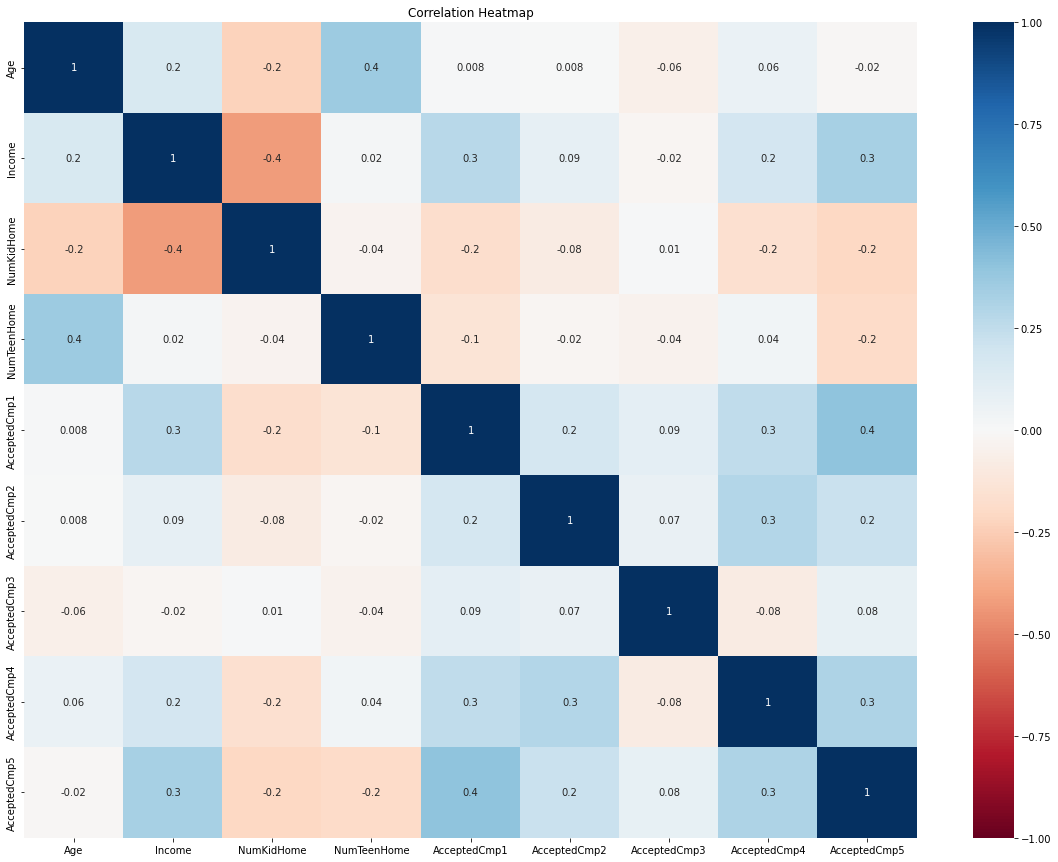

In [34]:
plt.figure(figsize = (20, 15))
tempdf2 = new_df1[['Age', 'MaritalStatus', 'Education', 'Income', 'NumKidHome', 'NumTeenHome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']]
s = sns.heatmap(tempdf2.corr(),  cmap = 'RdBu',vmin = -1, vmax = 1,center = 0, fmt='.1g', annot=True)
plt.title("Correlation Heatmap")
plt.show()

The above heatmap shows that:
1. Campaign 1, 2 and 3 were more sucessfull with customers having higher income. 
2. The chances of a customer accepting a campaign decreases with age.
3. All campaigns have been either unsucessfull or marginally sucessfull with customers having kids.

---



##Comparing types of purchases with campaign acceptance

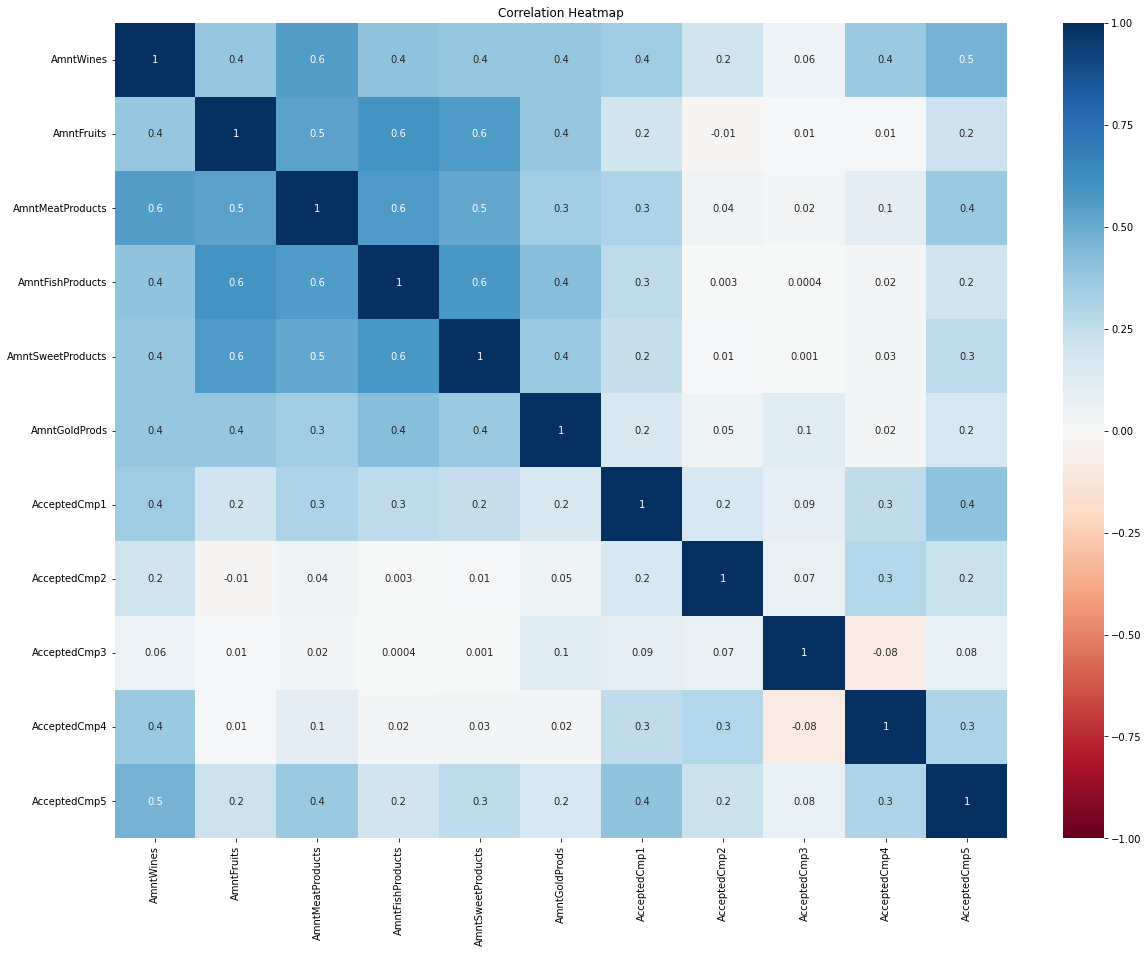

In [35]:
plt.figure(figsize = (20, 15))
tempdf3 = new_df1[['AmntWines', 'AmntFruits', 'AmntMeatProducts', 'AmntFishProducts', 'AmntSweetProducts', 
                   'AmntGoldProds', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']]
s = sns.heatmap(tempdf3.corr(),  cmap = 'RdBu',vmin = -1, vmax = 1,center = 0, fmt='.1g', annot=True)
plt.title("Correlation Heatmap")
plt.show()

The above heatmap shows that:
1. All campaigns were highly sucessfull with customers who purchase wine.
2. Campaign 2 and 3 are the least sucessfull campaigns.
3. Customers purchasing Fish products are the most likely to spend on other things.


---



##Comparing customer personal information (like age, marital status, etc.) with their purchasing behaviour

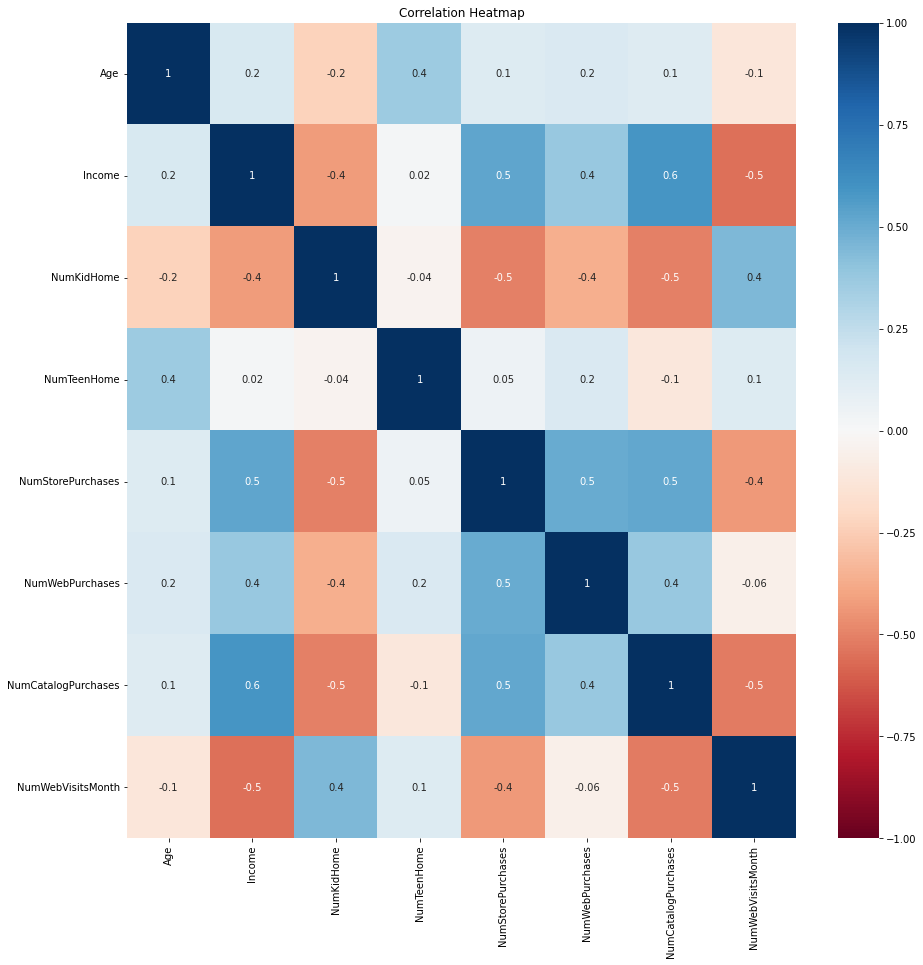

In [36]:
plt.figure(figsize = (15, 15))
tempdf4 = new_df1[['Age', 'MaritalStatus', 'Education', 'Income', 'NumKidHome', 
                   'NumTeenHome', 'NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumWebVisitsMonth']]
s = sns.heatmap(tempdf4.corr(),  cmap = 'RdBu',vmin = -1, vmax = 1,center = 0, fmt='.1g', annot=True)
plt.title("Correlation Heatmap")
plt.show()

The above heatmap shows that:
1. Customers having kids at home are the most likely to have visited the website last month. 
2. Customers having higher income are less likely to have visited the website last month, instead they focus on catalog purchases.


---

##Comparing purchase behaviour, complaints and campaign acceptance

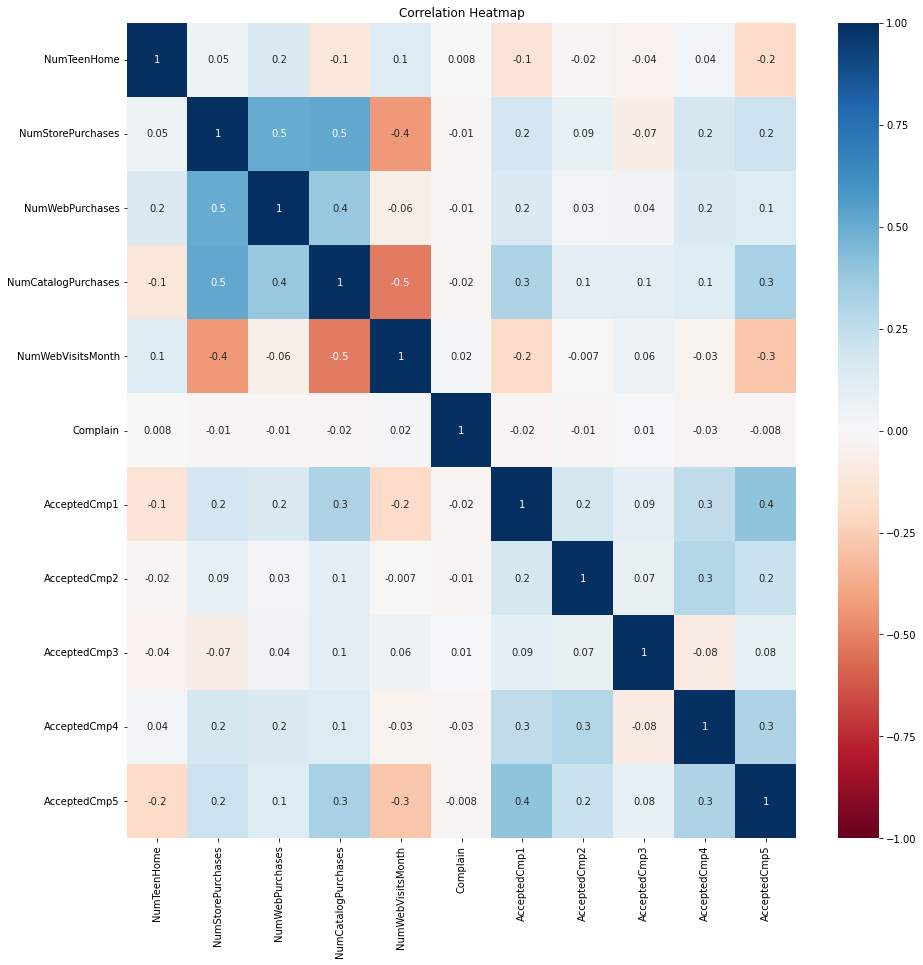

In [37]:
plt.figure(figsize = (15, 15))
tempdf5 = new_df1[['NumTeenHome', 'NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumWebVisitsMonth',
                   'Complain', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5' ]]
s = sns.heatmap(tempdf5.corr(),  cmap = 'RdBu',vmin = -1, vmax = 1,center = 0, fmt='.1g', annot=True)
plt.title("Correlation Heatmap")
plt.show()

The above heatmap shows that:
1. There is a marginally small correlation between a customer complaning and accepting a campaign.
2. There is a marginally small correlation between a customer complaning and their amount of purchases.
3. The data set is highly biased, i.e more observations of complainig customers are required.


---

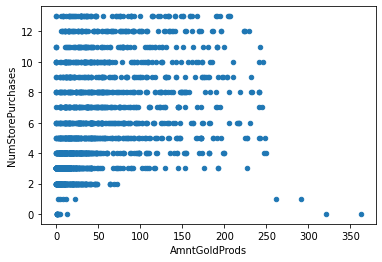

In [38]:
new_df1.plot(x='AmntGoldProds', y='NumStorePurchases', kind='scatter')

In [39]:
new_df1.columns

Index(['ID', 'Age', 'Education', 'MaritalStatus', 'Income', 'NumKidHome',
       'NumTeenHome', 'Recency', 'AmntWines', 'AmntFruits', 'AmntMeatProducts',
       'AmntFishProducts', 'AmntSweetProducts', 'AmntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'CustomerAcqYear',
       'CustomerAcqMonth', 'CustomerAcqDay', 'CustomerAcqDayName',
       'NumMinorHome', 'TotalAmntSpent', 'NumTotalPurchase', 'NumTotalAccept',
       'AOV'],
      dtype='object')

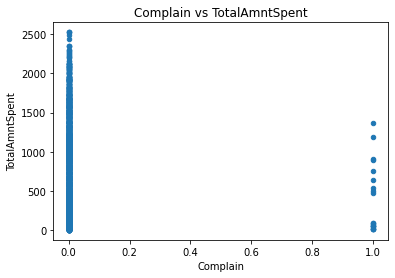

In [40]:
# Visualize NumWebPurchases vs NumWebVisitsMonth
new_df1.plot(x='Complain', y='TotalAmntSpent', kind='scatter')
plt.title("Complain vs TotalAmntSpent");

In [41]:
from scipy.stats import pearsonr

r, p_value  =  pearsonr(x=new_df1['Complain'], y=new_df1['TotalAmntSpent'])

# print results
print('Pearson correlation (r): ', r)
print('Pearson p-value: ', p_value)

Pearson correlation (r):  -0.033739650912663975
Pearson p-value:  0.11063526070950919


In [42]:
new_df1[new_df1.Complain > 0].ID.nunique()

20

Create a new coloumn for Age_grps

In [80]:
bins= [10,20,30,40,50,60,70,80,90]
labels = ['20','30','40','50','60','70','80','90']
new_df1['Age_grps'] = pd.cut(x=new_df1['Age'], bins=bins, labels=labels)

In [81]:
new_df1['Age_grps'] = new_df1['Age_grps'].astype(int)
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 2239
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2237 non-null   int64  
 1   Age                  2237 non-null   int64  
 2   Education            2237 non-null   object 
 3   MaritalStatus        2237 non-null   object 
 4   Income               2237 non-null   int64  
 5   NumKidHome           2237 non-null   int64  
 6   NumTeenHome          2237 non-null   int64  
 7   Recency              2237 non-null   int64  
 8   AmntWines            2237 non-null   int64  
 9   AmntFruits           2237 non-null   int64  
 10  AmntMeatProducts     2237 non-null   int64  
 11  AmntFishProducts     2237 non-null   int64  
 12  AmntSweetProducts    2237 non-null   int64  
 13  AmntGoldProds        2237 non-null   int64  
 14  NumDealsPurchases    2237 non-null   int64  
 15  NumWebPurchases      2237 non-null   i

In [82]:
from pandas.api.types import is_string_dtype, is_numeric_dtype

num_list = []
cat_list = []

for column in new_df1:
    if is_numeric_dtype(new_df1[column]):
        num_list.append(column)
    elif is_string_dtype(new_df1[column]):
        cat_list.append(column)
        

print("numeric:", num_list)
print("categorical:", cat_list)

numeric: ['ID', 'Age', 'Income', 'NumKidHome', 'NumTeenHome', 'Recency', 'AmntWines', 'AmntFruits', 'AmntMeatProducts', 'AmntFishProducts', 'AmntSweetProducts', 'AmntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'CustomerAcqYear', 'CustomerAcqMonth', 'CustomerAcqDay', 'CustomerAcqDayName', 'NumMinorHome', 'TotalAmntSpent', 'NumTotalPurchase', 'NumTotalAccept', 'AOV', 'Age_grps']
categorical: ['Education', 'MaritalStatus']


In [83]:
tempdf10 = new_df1[['Age', 'Age_grps', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']]
tempdf10.head(10)

,Age,Age_grps,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
0,37,40,0,0,0,0,0
1,34,40,0,0,0,0,0
2,61,70,0,0,0,0,0
3,69,70,0,0,0,0,0
4,38,40,0,0,0,0,0
5,47,50,0,0,0,0,0
6,63,70,0,0,0,0,0
7,63,70,0,0,0,0,0
8,47,50,0,0,0,0,0
9,59,60,0,0,0,0,0


In [84]:
accepted1 = tempdf10[tempdf10['AcceptedCmp1'] > 0]
accepted2 = tempdf10[tempdf10['AcceptedCmp2'] > 0]
accepted3 = tempdf10[tempdf10['AcceptedCmp3'] > 0]
accepted4 = tempdf10[tempdf10['AcceptedCmp4'] > 0]
accepted5 = tempdf10[tempdf10['AcceptedCmp5'] > 0]

In [85]:
print(f'Campaign 1 accepted by {len(tempdf10[tempdf10.AcceptedCmp1 > 0])} customers.')
print(f'Campaign 2 accepted by {len(tempdf10[tempdf10.AcceptedCmp2 > 0])} customers.')
print(f'Campaign 3 accepted by {len(tempdf10[tempdf10.AcceptedCmp3 > 0])} customers.')
print(f'Campaign 4 accepted by {len(tempdf10[tempdf10.AcceptedCmp4 > 0])} customers.')
print(f'Campaign 5 accepted by {len(tempdf10[tempdf10.AcceptedCmp5 > 0])} customers.')

Campaign 1 accepted by 144 customers.
Campaign 2 accepted by 30 customers.
Campaign 3 accepted by 163 customers.
Campaign 4 accepted by 167 customers.
Campaign 5 accepted by 162 customers.


<Figure size 1800x1800 with 0 Axes>

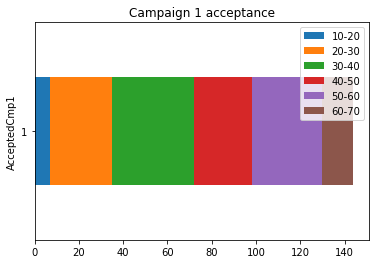

In [87]:
agelabels=['10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90']
plt.figure(figsize = (25 ,25))
#fig, ax = plt.subplots()
tempdf10[tempdf10.AcceptedCmp1 > 0].groupby(['AcceptedCmp1', 'Age_grps']).size().unstack().plot(kind='barh', stacked=True, )
plt.title('Campaign 1 acceptance')
plt.legend(agelabels);

<Figure size 1080x1080 with 0 Axes>

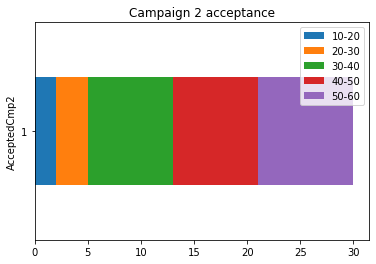

In [90]:
plt.figure(figsize = (15 ,15))
accepted2.groupby(['AcceptedCmp2', 'Age_grps']).size().unstack().plot(kind='barh', stacked=True, )
plt.title('Campaign 2 acceptance')
plt.legend(agelabels);

<Figure size 1440x1440 with 0 Axes>

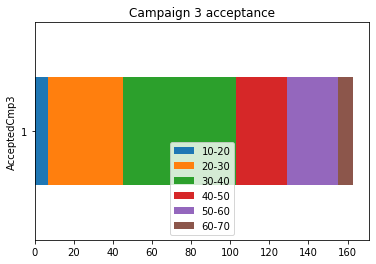

In [91]:
plt.figure(figsize = (20 ,20))
#fig, ax = plt.subplots()
accepted3.groupby(['AcceptedCmp3', 'Age_grps']).size().unstack().plot(kind='barh', stacked=True, )
plt.legend(loc=1)
plt.title('Campaign 3 acceptance')
plt.legend(agelabels);

<Figure size 1440x1440 with 0 Axes>

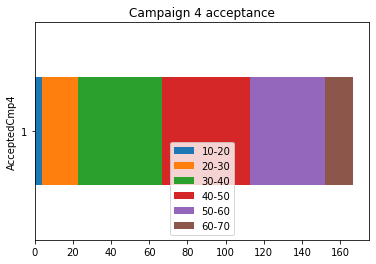

In [92]:
plt.figure(figsize = (20 ,20))
#fig, ax = plt.subplots()
accepted4.groupby(['AcceptedCmp4', 'Age_grps']).size().unstack().plot(kind='barh', stacked=True, )
plt.legend(loc=1)
plt.title('Campaign 4 acceptance')
plt.legend(agelabels);

<Figure size 1440x1440 with 0 Axes>

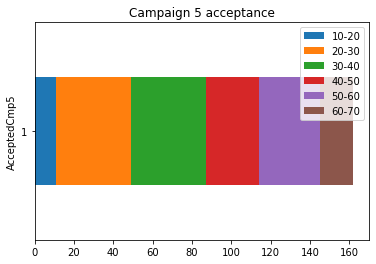

In [94]:
plt.figure(figsize = (20 ,20))
#fig, ax = plt.subplots()
accepted5.groupby(['AcceptedCmp5', 'Age_grps']).size().unstack().plot(kind='barh', stacked=True, )
plt.legend(loc=1)
plt.title('Campaign 5 acceptance')
plt.legend(agelabels);



> This shows that:
1. Campaign 2 was the least sucessfull of all campaigns.
2. All campaigns have been more sucessfull with customers of age group 30-40.
3. Customers belonging to age group 30-60 has been most receptive of marketing campaigns.
4. Customers belonging to age group 10-20 and 60-70 show little or no interest in the marketing campaigns, with respect to other groups.





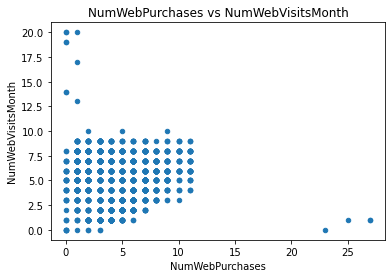

In [95]:
# Visualize NumWebPurchases vs NumWebVisitsMonth
new_df1.plot(x='NumWebPurchases', y='NumWebVisitsMonth', kind='scatter')
plt.title("NumWebPurchases vs NumWebVisitsMonth");

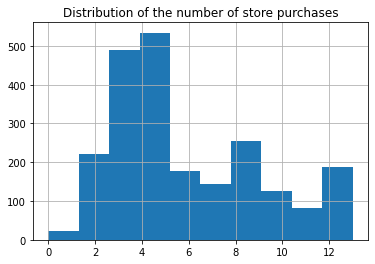

In [98]:
new_df1.NumStorePurchases.hist()
plt.title("Distribution of the number of store purchases");

In [97]:
# drop ID as everyone has unique ID
rd_df = new_df1.drop(columns=['ID'])
rd_df.replace([np.inf, -np.inf], 0, inplace=True)

# One-hot encoding
rd_df = pd.get_dummies(rd_df)

# Import train_test_split function
from sklearn.model_selection import train_test_split

X=rd_df.drop(columns=['NumStorePurchases'])  # Features
y=rd_df['NumStorePurchases']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 
# 70% training and 30% test

#Import Random Forest Model
from sklearn.ensemble import RandomForestRegressor

#Create a Random Forest Classifier with 100 trees
rg = RandomForestRegressor(n_estimators=100, n_jobs=-1)

#Train the model using the training sets y_pred=clf.predict(X_test)
rg.fit(X_train, y_train)

y_pred=rg.predict(X_test)

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.8658630952380952
Mean Squared Error: 1.7661449404761906
Root Mean Squared Error: 1.3289638597329088


The range of NumStorePurchases is 13, and the Root Mean Squared Error is only 1.1(less than 10% of the range), which means it is a relaible model.

##Feauture importance

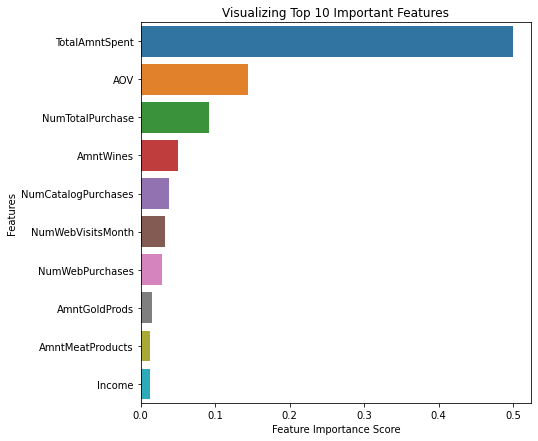

In [99]:
# find feature importance scores
import pandas as pd
feature_imp = pd.Series(rg.feature_importances_, index = list(X.columns)).sort_values(ascending=False)

feature_imp = feature_imp[:10]

# Creating a bar plot
plt.figure(figsize = (7, 7))
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:10])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Top 10 Important Features")
plt.savefig('important_feautres.png', bbox_inches='tight')
plt.show()

In [96]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 5.4 MB/s 


 94%|=================== | 632/672 [00:16<00:01]       

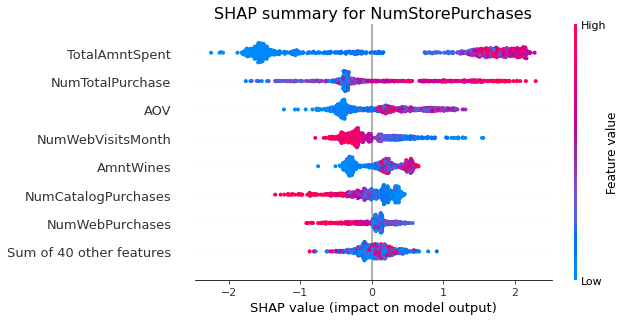

<Figure size 432x288 with 0 Axes>

In [100]:
import shap

# calculate shap values 
ex = shap.Explainer(rg, X_train)
shap_values = ex(X_test)

# plot
plt.title('SHAP summary for NumStorePurchases', size=16)
fig = shap.plots.beeswarm(shap_values, max_display=8)
plt.savefig('SHAP.png', bbox_inches='tight')
plt.show()

1. The number of store purchase increases with higher total amount spent, higher total purchase amount, higher AOV, and higher amount of wines purchases.
2. The number of store purchase decreases with higher number of website visits, higher number of purchases through catalog, and higher number of purchases through websites.
3. People who mostly shop at store tend to buy more wines, have higher average order volumne, and shop less through internet of catalog.

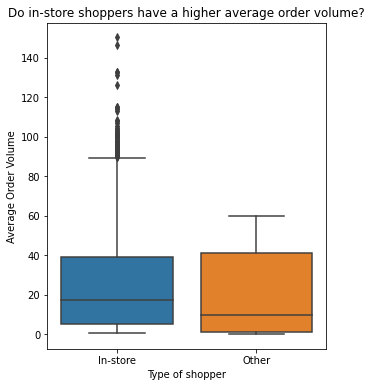

In [101]:
store_shoppers = new_df1[new_df1.NumStorePurchases>0]
store_shoppers = store_shoppers[store_shoppers.AOV <= (store_shoppers.AOV.mean()+3*store_shoppers.AOV.std())]
store_shoppers['Type of shopper'] = "In-store"
other_shoppers = new_df1[new_df1.NumStorePurchases==0]
other_shoppers['Type of shopper'] = "Other"

plt.figure(figsize = (5, 6))
all_shoppers = store_shoppers.append(other_shoppers)
plt.title("Do in-store shoppers have a higher average order volume?")
sns.boxplot(data = all_shoppers, x = 'Type of shopper', y = 'AOV')
plt.ylabel("Average Order Volume")
plt.savefig('AOV.png', bbox_inches='tight')

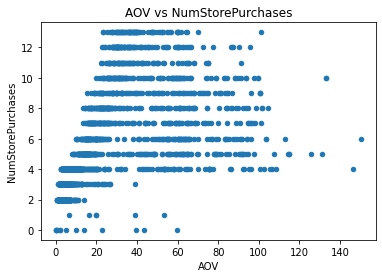

In [102]:
# Visualize MntGoldProds vs NumStorePurchases
all_shoppers.plot(x='AOV', y='NumStorePurchases', kind='scatter')
plt.title("AOV vs NumStorePurchases");
plt.savefig('AOV vs NumStorePurchases.png', bbox_inches='tight')

In [103]:
from scipy.stats import pearsonr
all_shoppers.replace([np.inf, -np.inf], 0, inplace=True)
r, p_value  =  pearsonr(x=all_shoppers['AOV'], y=all_shoppers['NumStorePurchases'])

# print results
print('Pearson correlation (r): ', r)
print('Pearson p-value: ', p_value)

Pearson correlation (r):  0.5505389394031132
Pearson p-value:  2.052634864542899e-177


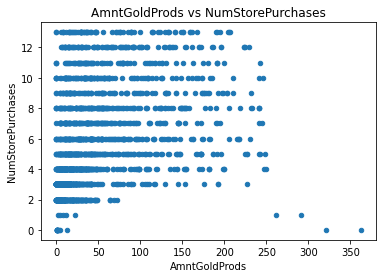

In [104]:
# Visualize MntGoldProds vs NumStorePurchases
new_df1.plot(x='AmntGoldProds', y='NumStorePurchases', kind='scatter')
plt.title("AmntGoldProds vs NumStorePurchases");
plt.savefig('AmntGoldProds vs NumStorePurchases.png', bbox_inches='tight')

In [128]:
from scipy.stats import pearsonr

list_ = ['AmntWines', 'AmntMeatProducts','AmntGoldProds', 'AmntFishProducts', 'AmntFruits',  'AmntSweetProducts']
for i in list_:
    r, p_value  =  pearsonr(x=new_df1[i], y=new_df1['NumTotalAccept'])
    print(i, "vs Total_accept:")
    # print results
    print('Pearson correlation (r): ', r)
    print('Pearson p-value: ', p_value)
    print(" ")

AmntWines vs Total_accept:
Pearson correlation (r):  0.47877613689047055
Pearson p-value:  1.538453690271273e-128
 
AmntMeatProducts vs Total_accept:
Pearson correlation (r):  0.3010334250296998
Pearson p-value:  4.4065093290159594e-48
 
AmntGoldProds vs Total_accept:
Pearson correlation (r):  0.19068006658523506
Pearson p-value:  9.275051767778576e-20
 
AmntFishProducts vs Total_accept:
Pearson correlation (r):  0.1591461828125726
Pearson p-value:  3.697344094817059e-14
 
AmntFruits vs Total_accept:
Pearson correlation (r):  0.1497632666014454
Pearson p-value:  1.082631664111806e-12
 
AmntSweetProducts vs Total_accept:
Pearson correlation (r):  0.17808985183102102
Pearson p-value:  2.1328375413163002e-17
 


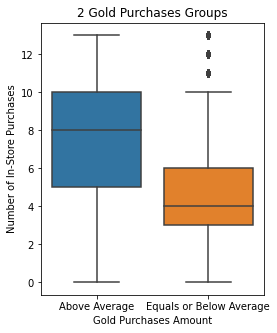

In [106]:
gold_above_avg =  new_df1[new_df1.AmntGoldProds > new_df1.AmntGoldProds.mean()]
gold_above_avg['Gold Purchases Amount'] = "Above Average"
gold_equ_or_below_avg =  new_df1[new_df1.AmntGoldProds <= new_df1.AmntGoldProds.mean()]
gold_equ_or_below_avg['Gold Purchases Amount'] = "Equals or Below Average"

plt.figure(figsize = (4, 5))
df_gold = gold_above_avg.append(gold_equ_or_below_avg)
plt.title("2 Gold Purchases Groups")
sns.boxplot(data = df_gold, x = 'Gold Purchases Amount', y = 'NumStorePurchases')
plt.ylabel("Number of In-Store Purchases");

In [107]:
new_df1.columns

Index(['ID', 'Age', 'Education', 'MaritalStatus', 'Income', 'NumKidHome',
       'NumTeenHome', 'Recency', 'AmntWines', 'AmntFruits', 'AmntMeatProducts',
       'AmntFishProducts', 'AmntSweetProducts', 'AmntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'CustomerAcqYear',
       'CustomerAcqMonth', 'CustomerAcqDay', 'CustomerAcqDayName',
       'NumMinorHome', 'TotalAmntSpent', 'NumTotalPurchase', 'NumTotalAccept',
       'AOV', 'Age_grps'],
      dtype='object')

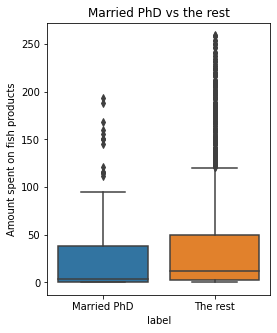

In [108]:
# divide the data into two groups: married PhD and the rest
married_phd = new_df1[(new_df1.Education == "PhD") & (new_df1.MaritalStatus == "Married")]
married_phd['label'] = "Married PhD"
the_rest = new_df1[(new_df1.Education != "PhD") | (new_df1.MaritalStatus != "Married")]
the_rest['label'] = "The rest"

df_combined = married_phd.append(the_rest)
plt.figure(figsize = (4, 5))
plt.title("Married PhD vs the rest")
sns.boxplot(data = df_combined, x = 'label', y = 'AmntFishProducts')
plt.ylabel("Amount spent on fish products");
plt.savefig('Married PhD vs the rest.png', bbox_inches='tight')

In [110]:
# use t-test to test these two groups have the same mean
from scipy.stats import ttest_ind 

#This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. 
#This test assumes that the populations have identical variances by default.
pval = ttest_ind(married_phd.AmntFishProducts, the_rest.AmntFishProducts).pvalue
print("T-test p-value: ", pval)

T-test p-value:  0.005297012242158541


In [112]:
new_df1.replace([np.inf, -np.inf], 0, inplace=True)

In [113]:
new_df1.mean()

ID                      5590.726419
Age                       51.098346
Income                 52227.402325
NumKidHome                 0.444345
NumTeenHome                0.506482
Recency                   49.104604
AmntWines                303.995530
AmntFruits                26.270451
AmntMeatProducts         166.916853
AmntFishProducts          37.523022
AmntSweetProducts         27.068842
AmntGoldProds             43.968708
NumDealsPurchases          2.326777
NumWebPurchases            4.087170
NumCatalogPurchases        2.662494
NumStorePurchases          5.794367
NumWebVisitsMonth          5.319177
AcceptedCmp3               0.072865
AcceptedCmp4               0.074654
AcceptedCmp5               0.072418
AcceptedCmp1               0.064372
AcceptedCmp2               0.013411
Complain                   0.008941
Z_CostContact              3.000000
Z_Revenue                 11.000000
Response                   0.149307
CustomerAcqYear         2013.027716
CustomerAcqMonth           6

In [115]:
# create 2 groups that accepted the offers from the last campaign and the campaign 1-5
cp_last = new_df1[new_df1.Response > 0]
cp__the_rest = new_df1[new_df1.AcceptedCmp2 == 0]

cp_last.shape[0], cp__the_rest.shape[0]

(334, 2207)

In [116]:
new_df1.columns

Index(['ID', 'Age', 'Education', 'MaritalStatus', 'Income', 'NumKidHome',
       'NumTeenHome', 'Recency', 'AmntWines', 'AmntFruits', 'AmntMeatProducts',
       'AmntFishProducts', 'AmntSweetProducts', 'AmntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'CustomerAcqYear',
       'CustomerAcqMonth', 'CustomerAcqDay', 'CustomerAcqDayName',
       'NumMinorHome', 'TotalAmntSpent', 'NumTotalPurchase', 'NumTotalAccept',
       'AOV', 'Age_grps'],
      dtype='object')

In [117]:
# remove the overlapping customers who accepted offers from both cp_last and cp__the_rest 
# so that twe can see the clear differences between these two groups
cp__the_rest2 = cp__the_rest
for i in list(cp__the_rest.ID):
    if i in list(cp_last.ID):
        cp__the_rest2 = cp__the_rest2[cp__the_rest2.ID != i]
        
cp_last.shape[0], cp__the_rest2.shape[0]

(334, 1893)

In [118]:
cp_last.mean()

ID                      5421.820359
Age                       50.583832
Income                 60183.242515
NumKidHome                 0.341317
NumTeenHome                0.305389
Recency                   35.383234
AmntWines                502.703593
AmntFruits                38.203593
AmntMeatProducts         294.353293
AmntFishProducts          52.050898
AmntSweetProducts         38.634731
AmntGoldProds             61.446108
NumDealsPurchases          2.335329
NumWebPurchases            5.071856
NumCatalogPurchases        4.203593
NumStorePurchases          6.095808
NumWebVisitsMonth          5.293413
AcceptedCmp3               0.230539
AcceptedCmp4               0.185629
AcceptedCmp5               0.275449
AcceptedCmp1               0.236527
AcceptedCmp2               0.059880
Complain                   0.008982
Z_CostContact              3.000000
Z_Revenue                 11.000000
Response                   1.000000
CustomerAcqYear         2012.748503
CustomerAcqMonth           6

In [119]:
new_df2 = new_df1[['Age', 'Income', 'NumMinorHome', 'CustomerAcqMonth', 'CustomerAcqDayName',
                  'AmntWines', 'AmntFruits', 'AmntMeatProducts', 'AmntFishProducts', 'AmntSweetProducts',
                  'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                  'TotalAmntSpent', 'NumTotalPurchase', 'AOV']]
new_df2.mean()

Age                       51.098346
Income                 52227.402325
NumMinorHome               0.950827
CustomerAcqMonth           6.465802
CustomerAcqDayName         2.988824
AmntWines                303.995530
AmntFruits                26.270451
AmntMeatProducts         166.916853
AmntFishProducts          37.523022
AmntSweetProducts         27.068842
NumWebPurchases            4.087170
NumCatalogPurchases        2.662494
NumStorePurchases          5.794367
TotalAmntSpent           605.743406
NumTotalPurchase          20.189987
AOV                       26.842831
dtype: float64

In [120]:
cp__the_rest2.mean()

ID                      5614.723191
Age                       51.192816
Income                 50753.805600
NumKidHome                 0.463814
NumTeenHome                0.541469
Recency                   51.498151
AmntWines                265.836767
AmntFruits                24.267829
AmntMeatProducts         144.358690
AmntFishProducts          34.996302
AmntSweetProducts         25.112520
AmntGoldProds             40.919704
NumDealsPurchases          2.329107
NumWebPurchases            3.918119
NumCatalogPurchases        2.384046
NumStorePurchases          5.728473
NumWebVisitsMonth          5.322240
AcceptedCmp3               0.044374
AcceptedCmp4               0.051241
AcceptedCmp5               0.035394
AcceptedCmp1               0.033809
AcceptedCmp2               0.000000
Complain                   0.008980
Z_CostContact              3.000000
Z_Revenue                 11.000000
Response                   0.000000
CustomerAcqYear         2013.077655
CustomerAcqMonth           6

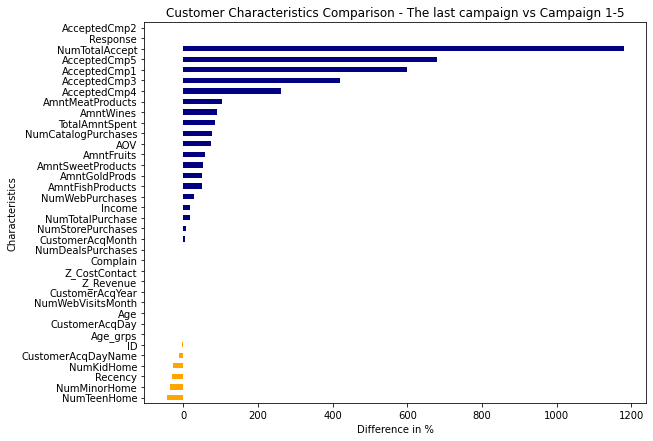

In [121]:
# visualize the differences
plt.figure(figsize = (9, 7))
value = pd.DataFrame((((cp_last.mean()) - cp__the_rest2.mean()) / cp__the_rest2.mean())*100)
value.dropna(inplace = True)
value.sort_values(by=0,inplace = True)
value['positive'] = value[0] >=0
value[0].plot(kind='barh', color=value.positive.map({True: 'navy', False: 'orange'}))
plt.title("Customer Characteristics Comparison - The last campaign vs Campaign 1-5")
plt.xlabel("Difference in %")
plt.ylabel("Characteristics")
plt.savefig('Customer Characteristics Comparison - The last campaign vs Campaign 1-5', bbox_inches='tight');

In [124]:
new_df1.columns

Index(['ID', 'Age', 'Education', 'MaritalStatus', 'Income', 'NumKidHome',
       'NumTeenHome', 'Recency', 'AmntWines', 'AmntFruits', 'AmntMeatProducts',
       'AmntFishProducts', 'AmntSweetProducts', 'AmntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'CustomerAcqYear',
       'CustomerAcqMonth', 'CustomerAcqDay', 'CustomerAcqDayName',
       'NumMinorHome', 'TotalAmntSpent', 'NumTotalPurchase', 'NumTotalAccept',
       'AOV', 'Age_grps'],
      dtype='object')

#Random Forest Model

In [125]:
# drop ID as everyone has unique ID
rd_df = new_df1.drop(columns=['ID', 'CustomerAcqYear','CustomerAcqMonth', 'CustomerAcqDay', 'CustomerAcqDayName',
                              'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Response'])
rd_df.replace([np.inf, -np.inf], 0, inplace=True)

# One-hot encoding
rd_df = pd.get_dummies(rd_df)

# Import train_test_split function
from sklearn.model_selection import train_test_split

X=rd_df.drop(columns=['NumTotalAccept'])  # Features
y=rd_df['NumTotalAccept']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 
# 70% training and 30% test

#Import Random Forest Model
from sklearn.ensemble import RandomForestRegressor

#Create a Random Forest Classifier with 100 trees
rg2 = RandomForestRegressor(n_estimators=100, n_jobs=-1)

#Train the model using the training sets y_pred=clf.predict(X_test)
rg2.fit(X_train, y_train)

y_pred=rg2.predict(X_test)

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.44142113095238095
Mean Squared Error: 0.5815414594907408
Root Mean Squared Error: 0.7625886568070238


#Conclusions
1. Campaign 1, 2 and 3 were more sucessfull with customers having higher income.
2. The chances of a customer accepting a campaign decreases with age.
3. All campaigns have been either unsucessfull or marginally sucessfull with customers having kids.
4. Campaign 2 and 3 are the least sucessfull campaigns.
5. Customers doing store purchases and catalog purchases were less likely to have visited the website in the last month.
6. Customers who visited the website last month were less likely to have accepted any campaign, except for campaign 3.
7. Campaign 3 was only sucessfull with people who do catalog purchases.
8. Customers are more likely to accept future campaigns if they have already accepted the present campaign, except for campaign 3.
9. The number of store purchase increases with higher total amount spent, higher total purchase amount, higher AOV, and higher amount of wines purchases.
10. The number of store purchase decreases with higher number of website visits and higher number of purchases through catalog.
11. People who mostly shop at store tend to buy more wines, have higher average order volumne, and shop less through internet of catalog.
12. There is a marginally small correlation between a customer complaning and accepting a campaign.
13. There is a marginally small correlation between a customer complaning and their amount of purchases.
14. Customers having kids at home are the most likely to have visited the website last month.
15. Customers having higher income are less likely to have visited the website last month, instead they focus on catalog purchases.

##Actionable Data-Driven Solutions
Corrections:


> 1. Study the shortcomings of campaign 2.


On Acquisition:


> 1. Keep using the same marketing techniques in the last campaign, and with a focus on promoting meat products and wines.
> 2. Try to have a brand discount day on Thursday or a brand discount month in June to attract new customers.

For Increasing revenue:


> 1. Have marketing campaigns to convert customers who shop mostly on a website or catalog to in-store purchasers as most in-store purchases have high average order volume.
> 2. Build a loyalty program to make high-income customers loyal as long as possible.
> 3. Focus on customers belonging to age group 30-60, as they have been most receptive of all marketing campaigns.


